In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("covid_19_india(1).csv")
print(data.shape)
data.head()

(2134, 9)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3


In [2]:
maharashtra_y = []
gujarat_y = []

#for j in range(0, 1671): #These are the dates - on columns
tempsum_maharashtra = 0
tempsum_gujarat = 0
for i in range(0, len(data)):
        if data.iloc[i, 3] == "Maharashtra": #Check if the country is italy
            tempsum_maharashtra = data.iloc[i, 8]
            maharashtra_y.append(tempsum_maharashtra)
        if data.iloc[i, 3] == "Gujarat": #Check if the country is India
            tempsum_gujarat = data.iloc[i, 8]
            gujarat_y.append(tempsum_gujarat)
print("Maharshtra cases up to 20/05/2020: {}".format(maharashtra_y[len(maharashtra_y) - 1]))
print("Gujarat cases up to 20/05/2020: {}".format(gujarat_y[len(gujarat_y) - 1]))
len(maharashtra_y)

Maharshtra cases up to 20/05/2020: 37136
Gujarat cases up to 20/05/2020: 12140


73

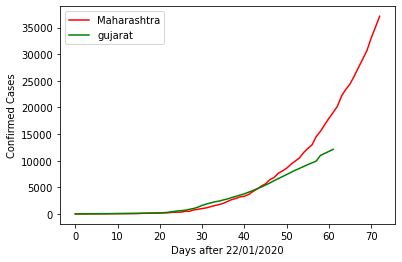

In [3]:
import matplotlib.pyplot as plt

plt.ylabel("Confirmed Cases")
plt.xlabel("Days after 22/01/2020")

plt.plot(maharashtra_y, color='red', label='Maharashtra')
plt.plot(gujarat_y, color='green', label='gujarat')
plt.legend()
plt.show()

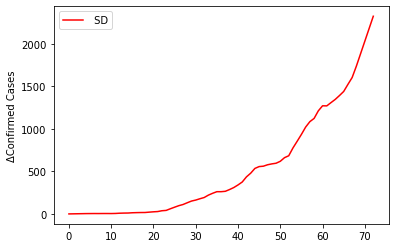

73


In [4]:
from scipy.signal import savgol_filter

deriv_maharashtra = savgol_filter(maharashtra_y, 9, 2, 1) #Polynomial degree is 2 since the function should look like a parabola

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_maharashtra, color='red', label=" SD")
plt.legend()
plt.show()
print(len(maharashtra_y))

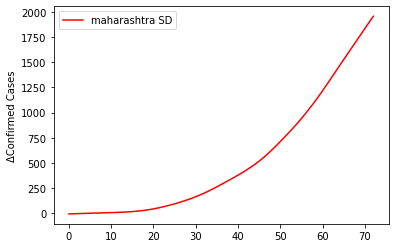

73

In [5]:
from scipy.signal import savgol_filter

deriv_maharashtra = savgol_filter(maharashtra_y, int(((len(maharashtra_y))+2)/3), 2, 1) #Polynomial degree is 2 since the function should look like a parabola
deriv_maharashtra = savgol_filter(deriv_maharashtra, int((len(maharashtra_y)+2)/5), 2, 0)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_maharashtra, color='red', label="maharashtra SD")
plt.legend()
plt.show()
len(deriv_maharashtra)

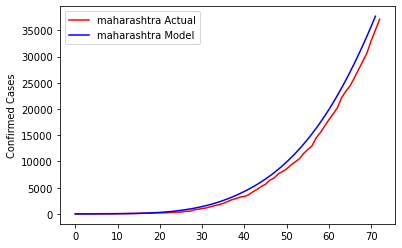

In [6]:
from scipy import integrate

maharashtra_y_pred = integrate.cumtrapz(deriv_maharashtra) 

plt.ylabel("Confirmed Cases")

plt.plot(maharashtra_y, color='red', label="maharashtra Actual")
plt.plot(maharashtra_y_pred, color='blue', label='maharashtra Model')
plt.legend()
plt.show()

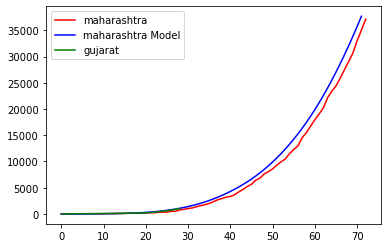

In [7]:
gujarat_y = gujarat_y[:29]
deriv_gujarat = savgol_filter(gujarat_y, 7, 2, 1)
deriv_gujarat = savgol_filter(deriv_gujarat, 9, 2, 0)

plt.plot(maharashtra_y, color='red', label='maharashtra')
plt.plot(maharashtra_y_pred, color='blue', label="maharashtra Model")
plt.plot(gujarat_y, color='green', label='gujarat')
plt.legend()
plt.show()

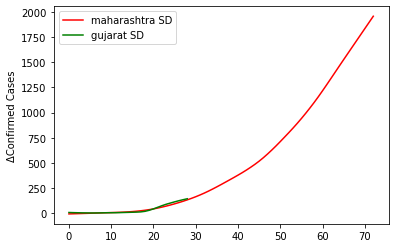

In [8]:
plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_maharashtra, color='red', label='maharashtra SD')
plt.plot(deriv_gujarat, color='green', label='gujarat SD')
plt.legend()
plt.show()

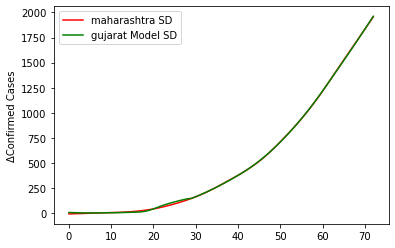

In [9]:
gujarat_derv_model = np.roll(deriv_maharashtra, 1)
gujarat_derv_model = savgol_filter(deriv_maharashtra, 19, 2, 0)
gujarat_basic_model= []
for i in range(29):
    gujarat_basic_model.append(deriv_gujarat[i])

for i in range(29, len(gujarat_derv_model)):
    gujarat_basic_model.append(gujarat_derv_model[i])

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_maharashtra, color='red', label="maharashtra SD")
plt.plot(gujarat_basic_model, color='green', label='gujarat Model SD')
plt.legend()
plt.show()

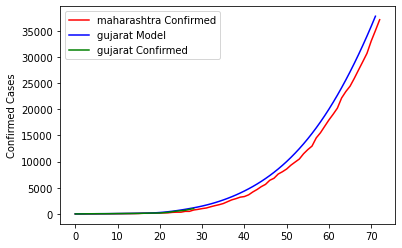

array([8.77485570e+00, 1.63210446e+01, 2.28878711e+01, 2.87246392e+01,
       3.39584828e+01, 3.88233302e+01, 4.38235622e+01, 4.94522727e+01,
       5.59278448e+01, 6.30136518e+01, 7.04085962e+01, 7.83124304e+01,
       8.72250000e+01, 9.73408009e+01, 1.08662771e+02, 1.21212709e+02,
       1.35540785e+02, 1.53808720e+02, 1.79994790e+02, 2.18269295e+02,
       2.71383086e+02, 3.40249969e+02, 4.24136590e+02, 5.21193022e+02,
       6.30207189e+02, 7.50708900e+02, 8.81840858e+02, 1.02274576e+03,
       1.17066671e+03, 1.32914406e+03, 1.50456340e+03, 1.69794584e+03,
       1.91025451e+03, 2.14236944e+03, 2.39509549e+03, 2.66916405e+03,
       2.96523223e+03, 3.28392454e+03, 3.62591693e+03, 3.99200955e+03,
       4.38317467e+03, 4.80059346e+03, 5.24569794e+03, 5.72014131e+03,
       6.22571599e+03, 6.76429753e+03, 7.33780911e+03, 7.94817582e+03,
       8.59728267e+03, 9.28694092e+03, 1.00188639e+04, 1.07947143e+04,
       1.16161548e+04, 1.24848505e+04, 1.34024818e+04, 1.43707858e+04,
      

In [10]:
gujarat_basic_model_confirmed = integrate.cumtrapz(gujarat_basic_model)

plt.ylabel("Confirmed Cases")

plt.plot(maharashtra_y, color='red', label='maharashtra Confirmed')
plt.plot(gujarat_basic_model_confirmed, color='blue', label='gujarat Model')
plt.plot(gujarat_y, color='green', label='gujarat Confirmed')
plt.legend()
plt.show()
gujarat_basic_model_confirmed

In [11]:
import time

predictions = pd.DataFrame(columns = ["Date", "Predicted Cases"])

start_pred = 1590019200
for i in range(53, len(gujarat_basic_model_confirmed)):
    t = time.strftime('%Y-%m-%d', time.localtime(start_pred))
    pred = gujarat_basic_model_confirmed[i]
    predictions.at[i-52, "Date"] = t
    predictions.at[i-52, "Predicted Cases"] = int(pred)
    start_pred = start_pred + 24*60*60
    
predictions

,Date,Predicted Cases
1,2020-05-21,12484
2,2020-05-22,13402
3,2020-05-23,14370
4,2020-05-24,15391
5,2020-05-25,16466
6,2020-05-26,17597
7,2020-05-27,18786
8,2020-05-28,20033
9,2020-05-29,21341
10,2020-05-30,22710
